# 1 - Least Squares Regression



### Generate Data

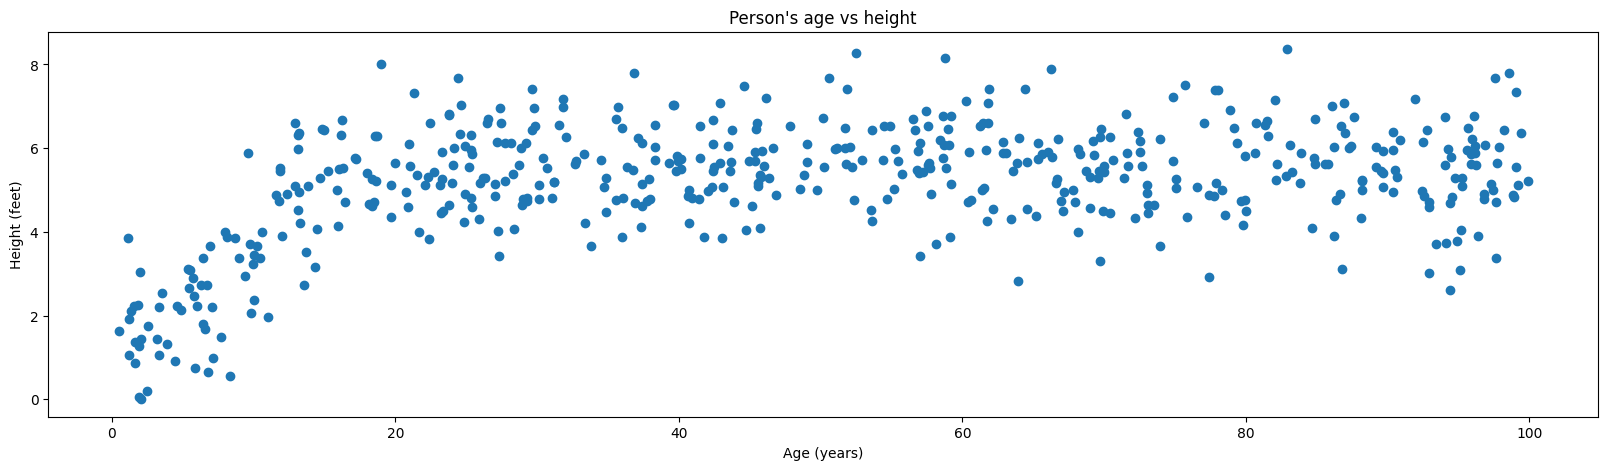

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random data
np.random.seed(0)
x = 100 * np.random.rand(512, 1)
y = (4) / (1 + np.exp(-x/2+5)) + np.random.randn(512, 1)
# make min value 0
y = y - np.min(y)

# Plotting the data
plt.figure(figsize=(20, 5))
plt.title("Person's age vs height")
plt.scatter(x, y)
plt.xlabel('Age (years)')
plt.ylabel('Height (feet)')
plt.show()


### Simple Example in Numpy

In [ ]:
# Helper Functions
def setup_plot():
    fig, axs = plt.subplots(1, 5, figsize=(18, 6))  # Change to 1 row, 3 columns
    return fig, axs


def update_plot(fig, axs, x, y, m, b, m_values, b_values, losses):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    axs[3].cla()
    axs[4].cla()

    axs[0].scatter(x, m * x + b, color="red")  # plot the fitted line
    axs[0].scatter(x, y, alpha=0.5)  # plot raw data
    axs[0].set_xlim(0, x.max())
    axs[0].set_ylim(0, y.max())
    axs[0].set_title("Fitted Line")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].legend(["Fitted Line", "Raw Data"])

    axs[1].scatter(m_values, losses, color="blue", alpha=0.25, label="Loss")
    axs[1].set_xlabel("Slope (m)")
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Slope vs. Loss")

    axs[2].plot(b_values, losses, color="green", alpha=0.25, label="Loss")
    axs[2].set_xlabel("Intercept (b)")
    axs[2].set_ylabel("Loss")
    axs[2].set_title("Intercept vs. Loss")

    axs[3].plot(m_values, b_values, color="red", alpha=0.25, label="Loss")
    axs[3].set_xlabel("Slope (m)")
    axs[3].set_ylabel("Intercept (b)")
    axs[3].set_title("Slope vs. Intercept")

    axs[4].plot(losses, color="purple", alpha=0.25, label="Loss")
    axs[4].set_xlabel("Iteration")
    axs[4].set_ylabel("Loss")
    axs[4].set_title(f"Loss over Iterations: {losses[-1]:.4f}")
    axs[4].set_yscale("log")

    plt.suptitle(f"Iteration: {len(losses)}")

    display(fig)  # display the plot
    clear_output(wait=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Initial parameters
m = np.random.randn(1)
b = np.random.randn(1)

# Learning rate
lr = 0.1

# Number of iterations
iterations = 100

# Setup the plot
fig, axs = setup_plot()

m_values, b_values, losses = [], [], []

# Perform SGD and update the plot
for i in range(iterations):
    # idx with batch size 32
    idx = np.random.randint(0, x.shape[0], 32)
    xi = x[idx]
    yi = y[idx]
    preds = m * xi + b
    error = preds - yi
    loss = (error**2).mean()  # calculate loss
    m_gradient = 2 * xi * error
    b_gradient = 2 * error
    m -= lr * m_gradient.mean()
    b -= lr * b_gradient.mean()

    m_values.append(m.flatten())
    b_values.append(b.flatten())
    losses.append(loss)

    update_plot(fig, axs, x, y, m, b, m_values, b_values, losses)

### PyTorch makes it easy

In [ ]:
# Helper Functions
def setup_plot():
    fig, axs = plt.subplots(1, 5, figsize=(18, 6))  # Change to 1 row, 3 columns
    return fig, axs


def update_plot(fig, axs, x, y, m, b, m_values, b_values, losses):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    axs[3].cla()
    axs[4].cla()
    val = m * x + b
    axs[0].scatter(x, val.detach().numpy(), color="red")  # plot the fitted line
    axs[0].scatter(x, y, alpha=0.5)  # plot raw data
    axs[0].set_xlim(0, x.max())
    axs[0].set_ylim(0, y.max())
    axs[0].set_title("Fitted Line")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].legend(["Fitted Line", "Raw Data"])

    axs[1].scatter(m_values, losses, color="blue", alpha=0.25, label="Loss")
    axs[1].set_xlabel("Slope (m)")
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Slope vs. Loss")

    axs[2].plot(b_values, losses, color="green", alpha=0.25, label="Loss")
    axs[2].set_xlabel("Intercept (b)")
    axs[2].set_ylabel("Loss")
    axs[2].set_title("Intercept vs. Loss")

    axs[3].plot(m_values, b_values, color="red", alpha=0.25, label="Loss")
    axs[3].set_xlabel("Slope (m)")
    axs[3].set_ylabel("Intercept (b)")
    axs[3].set_title("Slope vs. Intercept")

    axs[4].plot(losses, color="purple", alpha=0.25, label="Loss")
    axs[4].set_xlabel("Iteration")
    axs[4].set_ylabel("Loss")
    axs[4].set_title(f"Loss over Iterations: {losses[-1]:.4f}")
    axs[4].set_yscale("log")

    plt.suptitle(f"Iteration: {len(losses)}")

    display(fig)  # display the plot
    clear_output(wait=True)


In [ ]:
# Now lets do the same in pytorch
import torch
from torch import nn
from torch.optim import SGD

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
m = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = SGD([m, b], lr=lr)


fig, axs = setup_plot()
m_values, b_values, losses = [], [], []

# Perform SGD and update the plot

for i in range(iterations):
    optimizer.zero_grad()
    idx = torch.randint(0, 128, (32,))
    inputs = x_tensor[idx]
    preds = m * inputs + b
    loss = criterion(preds, y_tensor[idx])
    loss.backward()
    optimizer.step()

    # The srest is plotting
    m_values.append(float(m))
    b_values.append(float(b))
    losses.append(loss.item())

    update_plot(fig, axs, x_tensor, y_tensor, m, b, m_values, b_values, losses)

#### NN Module 2 layer

In [1]:
# Helper Functions
def setup_plot():
    fig, axs = plt.subplots(1, 5, figsize=(18, 6))  # Change to 1 row, 3 columns
    return fig, axs


def update_plot(fig, axs, x, y, model, m_values, b_values, losses):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    axs[3].cla()
    axs[4].cla()

    axs[0].scatter(x, model(torch.tensor(x).float()).detach(), color="red")  # plot the fitted line
    axs[0].scatter(x, y, alpha=0.5)  # plot raw data
    axs[0].set_xlim(0, x.max())
    axs[0].set_ylim(0, y.max())
    axs[0].set_title("Fitted Line")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].legend(["Fitted Line", "Raw Data"])

    axs[1].scatter(m_values, losses, color="blue", alpha=0.25, label="Loss")
    axs[1].set_xlabel("Slope (m)")
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Slope vs. Loss")

    axs[2].plot(b_values, losses, color="green", alpha=0.25, label="Loss")
    axs[2].set_xlabel("Intercept (b)")
    axs[2].set_ylabel("Loss")
    axs[2].set_title("Intercept vs. Loss")

    axs[3].plot(m_values, b_values, color="red", alpha=0.25, label="Loss")
    axs[3].set_xlabel("Slope (m)")
    axs[3].set_ylabel("Intercept (b)")
    axs[3].set_title("Slope vs. Intercept")

    axs[4].plot(losses, color="purple", alpha=0.25, label="Loss")
    axs[4].set_xlabel("Iteration")
    axs[4].set_ylabel("Loss")
    axs[4].set_title(f"Loss over Iterations: {losses[-1]:.4f}")
    axs[4].set_yscale("log")

    plt.suptitle(f"Iteration: {len(losses)}")

    display(fig)  # display the plot
    clear_output(wait=True)


In [30]:
# Now lets do the same in pytorch
import torch
from torch import nn
from torch.optim import SGD

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
model = nn.Linear(1, 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = SGD(model.parameters(), lr=lr)


fig, axs = setup_plot()
m_values, b_values, losses = [], [], []

# Perform SGD and update the plot
for i in range(iterations):
    optimizer.zero_grad()
    idx = torch.randint(0, 128, (32,))
    inputs = x_tensor[idx]
    preds = model(inputs)
    loss = criterion(preds, y_tensor[idx])
    loss.backward()
    optimizer.step()

    # The srest is plotting
    m_values.append(float(model.weight))
    b_values.append(float(model.bias))
    losses.append(loss.item())

    update_plot(fig, axs, x, y, model, m_values, b_values, losses)

NameError: name 'lr' is not defined